# Cleaning the SEGUE DR9 Dataset

In [2]:
from astropy.table import Table
import pandas as pd
import numpy as np
from time import time
import matplotlib.pyplot as plt
import os

In [3]:
# importing tables
start = time()
os.chdir('/arc/projects/k-pop/catalogues/')
sspp = Table.read('sdss-sspp-dr17.fits').to_pandas()
end = time()
print('Time Elapsed:',round(end-start,1),'s')

Time Elapsed: 59.3 s


In [4]:
sspp.columns

Index(['SPECOBJID', 'PLATEID', 'BESTOBJID', 'FLUXOBJID', 'TARGETOBJID',
       'SPECPRIMARY', 'SPECLEGACY', 'SPECSEGUE', 'SPECSEGUE1', 'SPECSEGUE2',
       ...
       'LOGG_NGS1_IRFM_UNC', 'FEH_NGS1_IRFM', 'FEH_NGS1_IRFM_IND',
       'FEH_NGS1_IRFM_UNC', 'LOGG_CAI1_IRFM', 'LOGG_CAI1_IRFM_IND',
       'LOGG_CAI1_IRFM_UNC', 'FEH_CAIIK1_IRFM', 'FEH_CAIIK1_IRFM_IND',
       'FEH_CAIIK1_IRFM_UNC'],
      dtype='object', length=239)

In [5]:
len(sspp)

1843200

with sspParams.zbclass
= STAR, SpecObjAll.primTarget = 2048, and
PlateX.programName = seglow%. https://arxiv.org/pdf/1110.5933.pdf

SpecObjAll.class = STAR, SpecObjAll.primTarget
= 2048, PlateX.programName = seglow%, and
PlateX.isPrimary = 1 https://arxiv.org/pdf/1110.5933.pdf

We remove all stars with g > 20 and i < 14.2 (using
magnitudes uncorrected for extinction) to ensure
that the targets are bright enough for high-quality
spectroscopy in the expected exposure time.

The 7 square degree area of each plate is large
enough that the extinction can be highly variable
across the plate, and there are always many more
targets than fibers available. We remove the regions of highest extinction from consideration to
maximize the number of useful spectra. For each
half of the plate, we calculate the 75th percentile
of the E(B − V ) distribution using the total line
of sight extinction from SFD98. This procedure is
done for each half independently to ensure that the
targets are approximately evenly distributed over
the plates, since the reach of the fibers is only about
half of the plate diameter.

We remove all objects with E(B − V ) larger than
the higher of the two 75th percentile values. Taking the higher value ensures that there are enough
usable targets on each half of the plate to fill all
the fibers given their limited reach across the plate.
This should not bias the sample, as we do not expect that the objects behind more extinction are
intrinsically any different from those that are unobscured. This is especially true for distant objects
that are located far behind the dust. The magnitudes used throughout the rest of this procedure are
corrected using the SFD98 extinction values. The
SFD98 extinction was applied so that stars in the
same approximate luminosity range were targeted
in each line of sight despite the large variation in
extinction among the different lines of sight.

We examine the (g − r)SFD distribution in bins of
gSFD, each one magnitude wide. For each distribution, we find the peak, which is the (g − r)SFD
color of the MSTO in each g-magnitude bin. In
addition, we determine the half maximum on the
blue side; this is (g − r)half−max.

The red cut for each bin is defined as (g − r)cut ≡
(g − r)half−max + 0.25. We fit a line to (g − r)cut as
a function of gbin, where gbin is the mean gSFD of
all the stars in each bin.

All stars on the blue side of the line are defined as
candidate spectroscopic targets with equal probability of being selected. Targets are randomly chosen from the resulting candidate list.

CC_MGH > 0 and CC_CAHK > 0. https://iopscience.iop.org/article/10.3847/1538-4365/ac5323/pdf

sdss-sspp-dr17.fits    : Binary table of SDSS optical from the SSPP stellar parameter pipeline
    - [Documentation](https://data.sdss.org/datamodel/files/SSPP_REDUX/ssppOut.html)
    
We recommend using the adopted Teff, log g, and [Fe/H] unless you want to use the parameters from a specific method for a very good reason. https://www.sdss4.org/dr17/spectro/sspp_data/

In [6]:
sspp['origin'] = 'SSPP'

In [7]:
required_columns = ['origin', 'SPECOBJID', 'RA', 'DEC', 'RV_ADOP', 'RV_ADOP_UNC', 'TEFF_NGS1', 'TEFF_NGS1_UNC', 
                    'LOGG_NGS2', 'LOGG_NGS2_UNC', 'FEH_NGS2', 'FEH_NGS2_UNC', 'AFE', 'AFE_UNC'] # NEED A GAIA SOURCE ID

In [8]:
sspp = sspp[required_columns]

In [9]:
sspp.describe()

,RA,DEC,RV_ADOP,RV_ADOP_UNC,TEFF_NGS1,TEFF_NGS1_UNC,LOGG_NGS2,LOGG_NGS2_UNC,FEH_NGS2,FEH_NGS2_UNC,AFE,AFE_UNC
count,1.843200e+06,1.843200e+06,1.843200e+06,1.843200e+06,1.843200e+06,1.843200e+06,1.843200e+06,1.843200e+06,1.843200e+06,1.843200e+06,1.843200e+06,1.843200e+06
mean,1.742926e+02,2.233414e+01,-6.691507e+03,-6.698593e+03,-4.876977e+03,-6.752664e+03,-6.890693e+03,-6.890695e+03,-7.039973e+03,-7.039973e+03,-7.917535e+03,-7.917535e+03
std,8.549913e+01,2.824971e+01,4.721302e+03,4.724398e+03,7.370989e+03,4.737391e+03,4.682502e+03,4.682432e+03,4.611810e+03,4.612470e+03,4.149833e+03,4.149832e+03
min,-9.999000e+03,-9.999000e+03,-9.999000e+03,-9.999000e+03,-9.999000e+03,-9.999000e+03,-9.999000e+03,-9.999000e+03,-9.999000e+03,-9.999000e+03,-9.999000e+03,-9.999000e+03
25%,1.303058e+02,3.123593e+00,-9.999000e+03,-9.999000e+03,-9.999000e+03,-9.999000e+03,-9.999000e+03,-9.999000e+03,-9.999000e+03,-9.999000e+03,-9.999000e+03,-9.999000e+03
50%,1.773605e+02,1.989967e+01,-9.999000e+03,-9.999000e+03,-9.999000e+03,-9.999000e+03,-9.999000e+03,-9.999000e+03,-9.999000e+03,-9.999000e+03,-9.999000e+03,-9.999000e+03
75%,2.247052e+02,3.794595e+01,-5.318622e+01,1.757547e+00,4.843951e+03,2.114411e+01,3.472811e+00,3.822186e-02,-1.597997e+00,4.586651e-02,-9.999000e+03,-9.999000e+03
max,3.608290e+02,8.485214e+01,1.506834e+03,9.989497e+03,9.242688e+03,1.130519e+03,4.842000e+00,1.491475e+00,9.950001e-01,1.202881e+00,6.061999e-01,3.214651e-01


In [10]:
sspp_n = sspp[(sspp['RA'] != -9999.) & (sspp['DEC'] != -9999.) & (sspp['RV_ADOP_UNC'] >= 0) & (sspp['TEFF_NGS1_UNC'] >= 0) & \
              (sspp['LOGG_NGS2_UNC'] >= 0) & (sspp['FEH_NGS2_UNC'] >= 0) & (sspp['AFE_UNC'] >= 0)] # TEFF NGS1, LOGG & FEH NGS2 since AFE NGS2

In [11]:
sspp_n.describe()

,RA,DEC,RV_ADOP,RV_ADOP_UNC,TEFF_NGS1,TEFF_NGS1_UNC,LOGG_NGS2,LOGG_NGS2_UNC,FEH_NGS2,FEH_NGS2_UNC,AFE,AFE_UNC
count,397019.000000,397019.000000,397019.000000,397019.000000,397019.000000,397019.000000,397019.000000,397019.000000,397019.000000,397019.000000,397019.000000,397019.000000
mean,170.854631,22.989304,-18.003222,3.206155,5756.342773,42.611553,3.905368,0.065121,-0.935532,0.065878,0.259103,0.015333
std,96.673858,21.409766,106.339180,2.601045,720.954529,23.511351,0.750950,0.036682,0.593713,0.026579,0.134031,0.008599
min,0.000000,-19.702714,-969.631592,0.372998,3865.000000,5.000000,0.152001,0.010000,-4.489712,0.010000,-0.063400,0.002000
25%,112.425230,4.755662,-66.309761,1.446722,5237.534912,25.439956,3.730070,0.045200,-1.295000,0.050179,0.151900,0.010405
50%,168.869050,21.061700,-11.453746,2.374522,5650.638184,38.320412,4.084656,0.059959,-0.860323,0.060031,0.259397,0.013303
75%,238.732720,38.763022,34.500290,4.085080,6229.692871,53.111805,4.362836,0.075817,-0.545897,0.072233,0.365588,0.017694
max,360.823000,84.852144,1006.704651,199.504532,9159.857422,893.126526,4.842000,1.302885,0.995000,0.879360,0.606200,0.264845


In [12]:
435906-398337 # NUMBER LOST BY MAKING THE ALPHA/Fe CUT

37569

(5.0, 0.0)

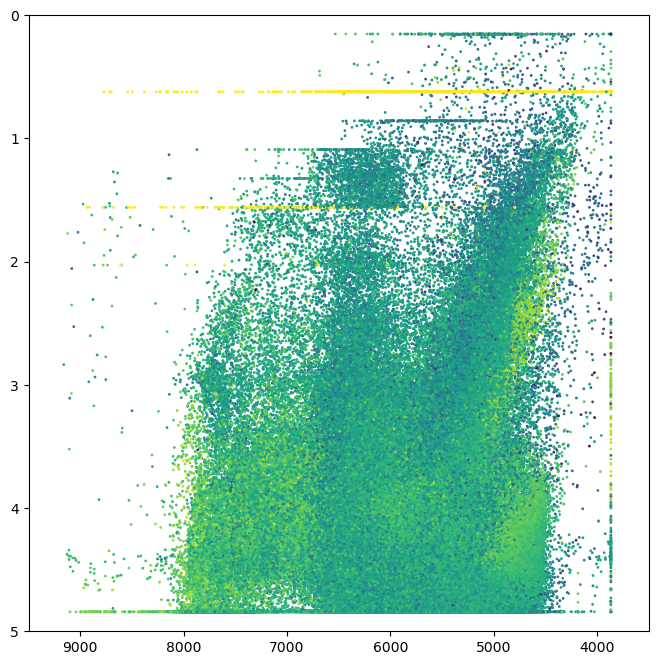

In [13]:
plt.figure(figsize=(8,8))
plt.scatter(sspp_n['TEFF_NGS1'].values, sspp_n['LOGG_NGS2'].values, c=sspp_n['FEH_NGS2'].values, s=1, rasterized=True)
plt.xlim(9500,3500)
plt.ylim(5,0)

(5.1, 0.0)

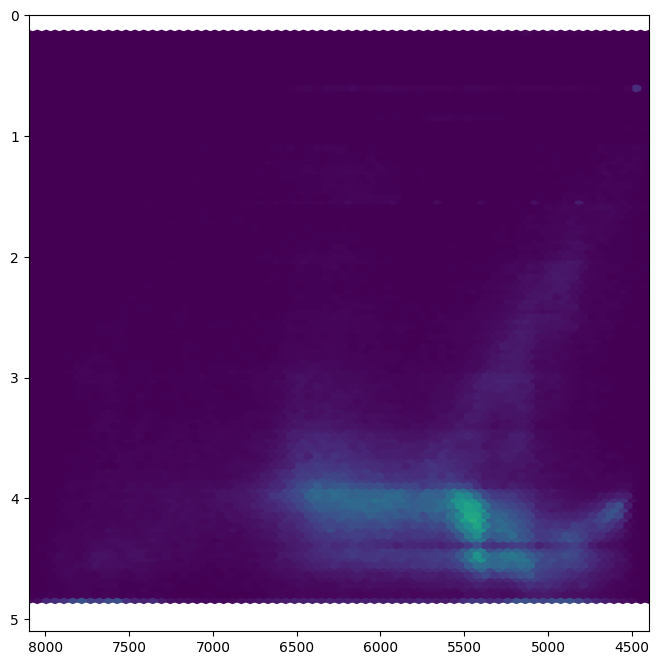

In [14]:
plt.figure(figsize=(8,8))
plt.hexbin(sspp_n['TEFF_NGS1'].values, sspp_n['LOGG_NGS2'].values)
plt.xlim(8100,4400)
plt.ylim(5.1,0)